# Challenge 1: The banknote-authentication data set problem

We will perform a nearly realistic analysis of the data set bank note authentication that can be downloaded from https://archive-beta.ics.uci.edu/dataset/267/banknote+authentication

## Data set description

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
These features are:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

## Task description
We have a binary classification problem. The assignment can be divided in several parts:
    
    1. Load the data and pretreatment.
    2. Data exploring by Unsupervised Learning techniques.
    3. Construction of several models of Supervised Learning.

# 1. Data pretreatment

Load the data and look at it: It is needed some kind of scaling? Why? Are the data points sorted in the original data set? Can it generate problems? How can this be solved?

--------------------------------------------------------------------

I will start by carrying out a preliminary analysis of the data. In this file I will focus on the code and explaining what it does.

For the analyzes and conclusions on the results obtained, I will write everything in the report that will be placed alongside this file

## Import the dataset

In [ ]:
# Install the 'ucimlrepo' package using the pip package manager
# We need this package because it contains the dataset we are gonna use

!pip install ucimlrepo

In [ ]:
# Import the 'fetch_ucirepo' function from the 'ucimlrepo' package
from ucimlrepo import fetch_ucirepo

# Fetch the banknote_authentication dataset from the UCI Machine Learning Repository using its ID (267)
banknote_authentication = fetch_ucirepo(id=267)

# Extract features and targets from the dataset
# Features are stored in 'x'
# Targets are stored in 'y' (both as pandas DataFrame)
x = banknote_authentication.data.features
y = banknote_authentication.data.targets

## Analysis of dataset features

In [ ]:
# The describe function prints some values ​​that can be useful during a first analysis (number of rows, average, max, min, etc.), reducing the time we would have spent to obtain these values.
x.describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [ ]:
# Print of the dataset x
x

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


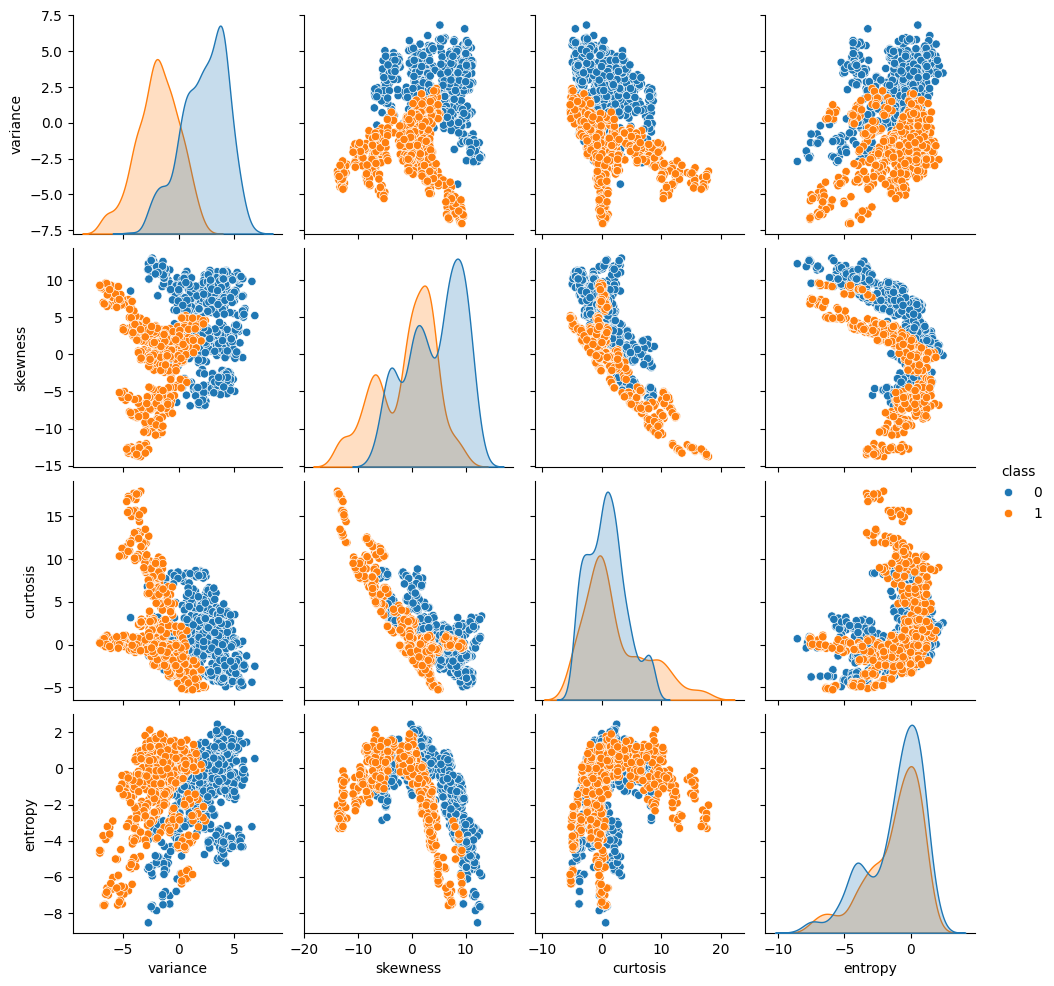

In [ ]:
# Import the 'seaborn' library as 'sns' for data visualization
import seaborn as sns
from pandas import concat

df = concat([x, y], axis=1)

# Create a pairplot to visualize relationships between features in the 'x' DataFrame
sns.pairplot(df, hue = 'class')

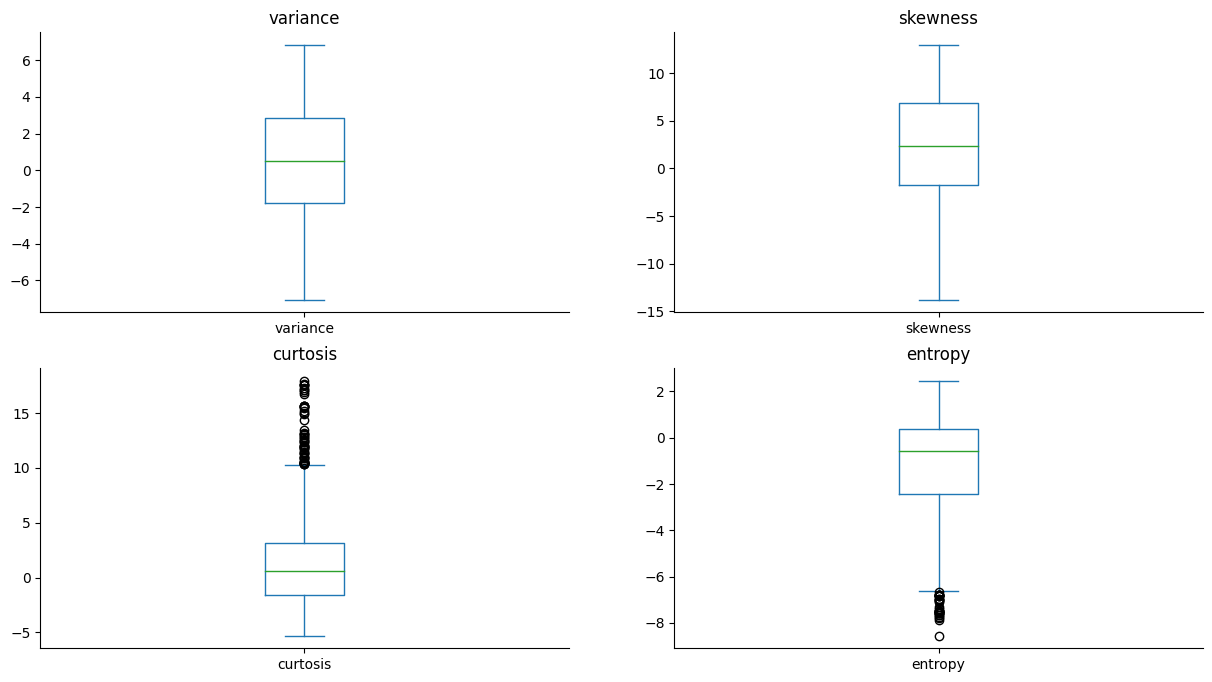

In [ ]:
# Even if the "describe()" function together with the pairplot allows us a
# complete visualization of the data, we can still use a boxplot to allow us a
# more immediate visualization of the fundamental values ​​and the status of the
# individual features.

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 8))

rows = 2
columns = 2

plt.subplot(2, 2, 1)

x['variance'].plot(kind='box', title='variance')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(2, 2, 2)

x['skewness'].plot(kind='box', title='skewness')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(2, 2, 3)

x['curtosis'].plot(kind='box', title='curtosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(2, 2, 4)

x['entropy'].plot(kind='box', title='entropy')
plt.gca().spines[['top', 'right',]].set_visible(False)



## Analysis of datasets with values ​​to predict

In [ ]:
# Print of the dataset y
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


In [ ]:
print(f"Number of index equals to 0: {len(y[y['class'] == 0])} (~55% of the dataset)\nNumber of index equals to 1: {len(y[y['class'] == 1])} (~45% of the dataset)")

Number of index equals to 0: 762 (~55% of the dataset)
Number of index equals to 1: 610 (~45% of the dataset)


## Preparation of the dataset

At this point the analysis has been completed. The dataframe contains no anomalous or missing values ​​and excellent correlations can be seen between the data. The only thing I noticed is that the 0/1 dataframe is not mixed. I then proceed to merge the features and values ​​to be predicted (so that the indices do not mix differently), mix all the rows randomly, divide again into two datasets and create the training group and the test group.

In [ ]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [ ]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
# Normalizzo i dati
for col in x.columns:
    x[col] = absolute_maximum_scale(x[col])

# Display the shuffled features and targets
print(x)

      variance  skewness  curtosis   entropy
0     0.514278  0.629205 -0.156593 -0.052291
1     0.645532  0.592996 -0.137142 -0.171042
2     0.548984 -0.191555  0.107333  0.012453
3     0.490848  0.691406 -0.223747 -0.420486
4     0.046753 -0.323471  0.255017 -0.115673
...        ...       ...       ...       ...
1367  0.057673  0.097959 -0.080887 -0.065451
1368 -0.197200 -0.354118  0.361313  0.039984
1369 -0.532554 -0.977166  0.981358 -0.324875
1370 -0.506056 -0.608628  0.691288 -0.150008
1371 -0.360958 -0.047777  0.149726  0.139819

[1372 rows x 4 columns]


<ipython-input-11-83835f572994>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = absolute_maximum_scale(x[col])


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, shuffle = True)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

      variance  skewness  curtosis   entropy
662   0.422260  0.638520 -0.202812 -0.160899
512   0.378410  0.780797 -0.189620 -0.487647
1193 -0.533548 -0.602014  0.574718  0.044523
682   0.529970 -0.281999  0.187294 -0.000708
1313 -0.214112 -0.531405  0.440560  0.143761
...        ...       ...       ...       ...
763   0.055398 -0.010367 -0.001785  0.041043
835  -0.133845  0.002854 -0.013494  0.036959
1216  0.085273  0.072565 -0.123420  0.011394
559   0.286349 -0.018330  0.288424  0.125910
684  -0.294784  0.785756  0.147478 -0.565850

[1029 rows x 4 columns]
      variance  skewness  curtosis   entropy
1023 -0.251530 -0.781705  0.569988 -0.117487
642   0.728774 -0.002254  0.018193  0.130449
1196 -0.286122  0.267725 -0.108131 -0.455277
31    0.211357  0.263368  0.184522  0.057230
253   0.750742  0.236475 -0.076536  0.136497
...        ...       ...       ...       ...
866  -0.588021  0.251352 -0.026686 -0.454821
361   0.480652  0.237231  0.050742  0.029396
703   0.186223  0.330078  0.12

# 2. Unsupervised Learning

Use PCA and plot the two first components colouring according with the class. Are the classes linearly separable in this projection? What happens when I applied k-means with two classes in this space? And if I use all the coordinates? Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

## Principal Component Analysis (PCA)

In [ ]:
import numpy as np
from sklearn import preprocessing

# Rescaling the features of the data to handle different units: subtracting the mean and dividing by the standard deviation
scaler = preprocessing.StandardScaler().fit(x)

# Transforming the original data using the calculated mean and standard deviation
x_scaled = scaler.transform(x)

# Since the features are already centered, we compute the covariance matrix as:
# Covariance matrix C = X^T * X
C = np.matmul(x_scaled.transpose(),x_scaled)

# Calculating eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Sorting eigenvalues and corresponding eigenvectors in descending order
arranged_eigenvalues = []
arranged_eigenvectors = [[]]

sort = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sort]
sorted_eigenvectors = eigenvectors[sort]

# Projecting the original data onto the principal components

print(x_scaled)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]


In [ ]:
# Calculating the cumulative proportion of explained variance
cumulative_variance = np.zeros(x.shape[1])
total_variance = np.sum(sorted_eigenvalues)

# Accumulating the proportion of variance explained up to each component
for i in range(x.shape[1]):
    cumulative_variance[i] = np.sum(sorted_eigenvalues[:i+1]) / total_variance

# Generating an array representing the components for visualization
components = np.arange(x.shape[1]) + 1

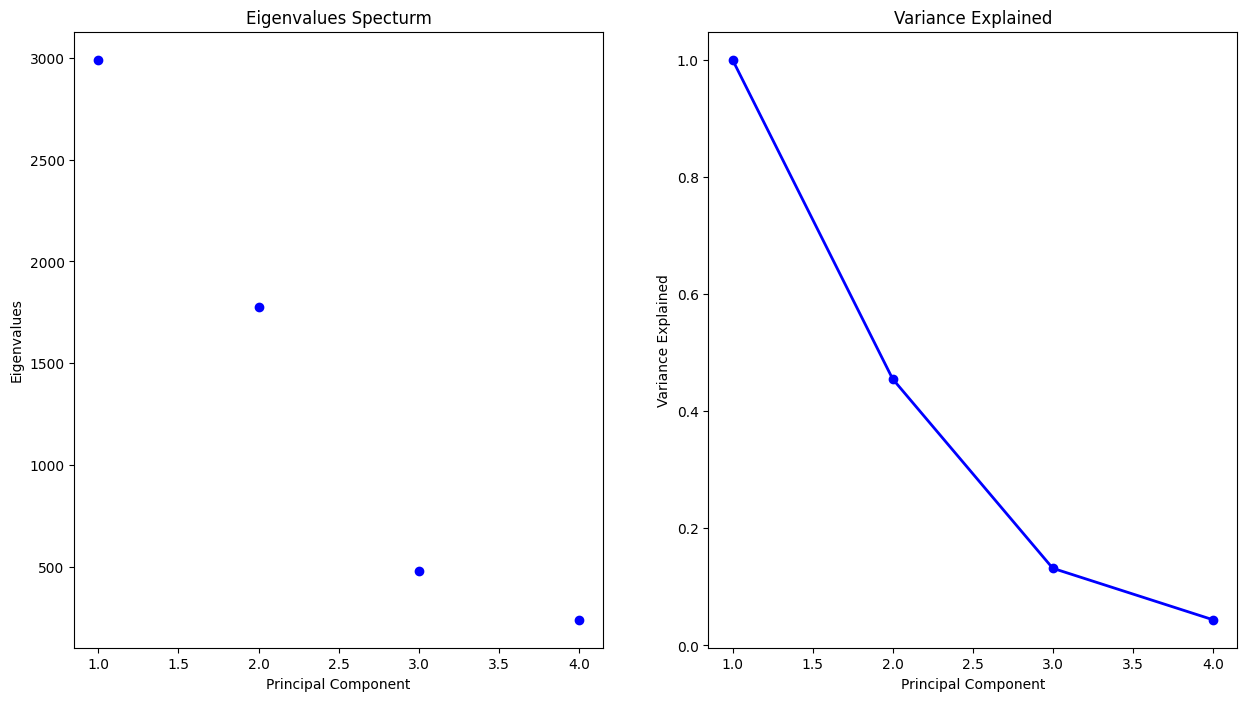

In [ ]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)

plt.plot(components, eigenvalues[::-1], 'o', linewidth=2, color='blue')
plt.title('Eigenvalues Specturm')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')

plt.subplot(1,2,2)

plt.plot(components, cumulative_variance[::-1], 'o-', linewidth=2, color='blue')
plt.title('Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
# Displaying the plots
plt.show()

In [ ]:
percentage = np.round(cumulative_variance, decimals=4)
for i, percent in zip(range(4),percentage):
    print(f'The proportion of variance explained by PC{i+1}: {percent}')

The proportion of variance explained by PC1: 0.0439
The proportion of variance explained by PC2: 0.1317
The proportion of variance explained by PC3: 0.455
The proportion of variance explained by PC4: 1.0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

Principal_components=pca.fit_transform(x_scaled)

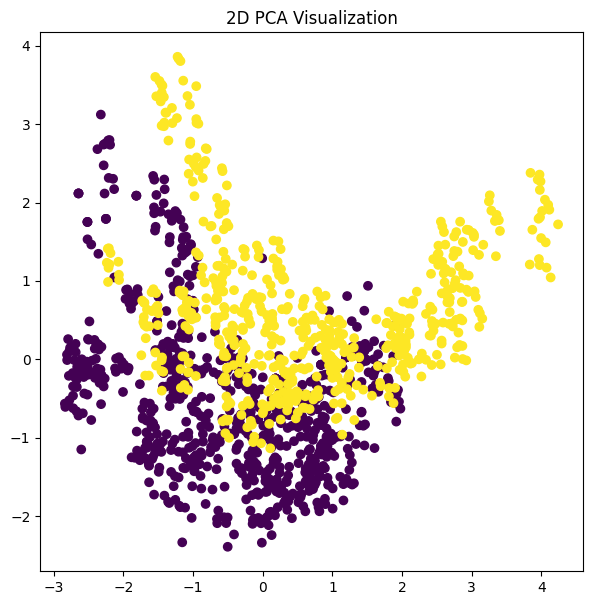

In [ ]:
# Plotting the 2D representation of the dataset using the first two Principal Components (PCs),
# with points colored by their ground truth labels.
fig, ax = plt.subplots(figsize=(7, 7))

# Scatter plot of the dataset in 2D space using the first two Principal Components
ax.scatter(Principal_components[:, 0], Principal_components[:, 1], c=y.values)

# Setting the title of the plot
ax.set_title('2D PCA Visualization')

# Displaying the plot
plt.show()

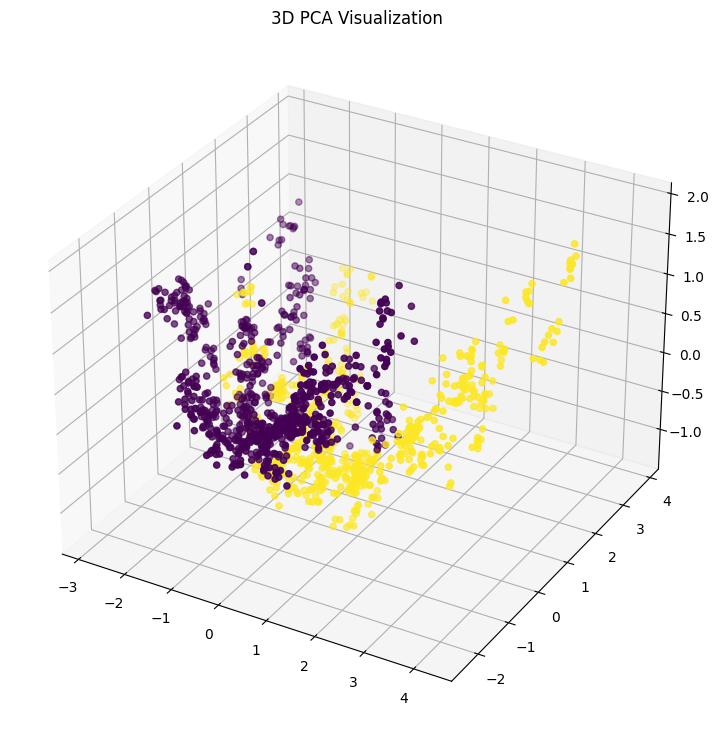

In [ ]:
# Plotting the 3D representation of the dataset using the first three Principal Components (PCs),
# with points colored by their ground truth labels.
fig = plt.figure(figsize=(9, 9))

# Creating a 3D subplot
ax = fig.add_subplot(projection='3d')

# Scatter plot of the dataset in 3D space using the first three Principal Components
ax.scatter(Principal_components[:, 0], Principal_components[:, 1], Principal_components[:, 2], c=y.values)

# Setting the title of the plot
ax.set_title('3D PCA Visualization')

# Displaying the 3D plot
plt.show()

In [ ]:
from scipy.spatial.distance import cdist

# Compute the pairwise Euclidean distance matrix between unique rows of the scaled dataset
unique_scaled_data = np.unique(x_scaled, axis=0)
distance_matrix = cdist(unique_scaled_data, unique_scaled_data)
distance_matrix.sort(axis=1)

# Calculate the ratio of the second-nearest neighbor distance to the nearest neighbor distance
mu_i = np.divide(distance_matrix[:, 2], distance_matrix[:, 1])

# Compute the logarithm of the calculated ratios
log_mu_i = np.log(mu_i)

# Calculate the inverse of the mean logarithm of the second-nearest neighbor ratios
two_nn = 1 / np.mean(log_mu_i)

# Print the resulting value
print("Two-Nearest-Neighbor (2NN) Distance Measure:", two_nn)

Two-Nearest-Neighbor (2NN) Distance Measure: 2.3481336042537233


## K-means


In [ ]:
def k_means_internal(k, X, init):
    '''
    Perform k-means clustering.

    Parameters
    ----------
    k : int
        Number of clusters.
    X : matrix of dimension N x D
        Dataset.
    init : str, {'++', 'random'}
        Type of initialization for k-means algorithm.

    Returns
    -------
    tuple
        z_new : array
            Cluster assignments for each data point.
        L : float
            Final value of the k-means objective function (loss).
        niter : int
            Number of iterations performed.
    '''
    N = X.shape[0]  # number of points
    nc = X.shape[1]  # number of coordinates
    ll = np.arange(k)
    z = np.zeros(N, dtype='int')  # cluster number assigned to each data point
    cent = np.zeros([k, nc])  # coordinates of the cluster centers

    # k-means++
    if init == '++':
        b = np.random.choice(N, 1, replace=False)  # choose the first cluster center at random
        cent[0, :] = X[b, :]
        nchosen = 1  # number of cluster centers already set

        while nchosen < k:
            dist = cdist(cent[:nchosen, :], X)  # distance of each point from the cluster centers
            dmin = np.min(dist, axis=0)  # min distance between point and cluster centers
            prob = dmin**2
            prob = prob / np.sum(prob)

            # choose next center according to the computed prob
            b = np.random.choice(N, 1, replace=False, p=prob)
            cent[nchosen, :] = X[b, :]
            nchosen += 1

    # random initialization
    else:
        b = np.random.choice(N, k, replace=False)  # choose the k centers randomly
        for i in ll:
            cent[i, :] = X[b[i], :]

    dist = cdist(cent, X)  # distance of each point from cluster centers
    z_new = np.argmin(dist, axis=0)  # assign each point to cluster with the closest center
    dmin = np.min(dist, axis=0)
    niter = 0
    L = np.sum(dmin**2)  # loss function evaluation

    while (z_new != z).any():  # until a stable configuration is reached
        z = np.copy(z_new)

        for i in range(k):
            cent[i, :] = np.average(X[z == i, :], axis=0)  # compute cluster centroids

        dist = cdist(cent, X)  # update distances from cluster centers
        z_new = np.argmin(dist, axis=0)  # find cluster with the minimum centroid distance
        dmin = np.min(dist, axis=0)
        L = np.sum(dmin**2)  # loss function evaluation
        niter += 1

    return z_new, L, niter

In [ ]:
def k_means(k, X, init='++', n_init=20):
    '''
    Perform k-means clustering with multiple initializations to find the best result.

    Parameters
    ----------
    k : int
        Number of clusters.
    X : matrix of dimension N x D
        Dataset.
    init : str, {'++', 'random'}, optional
        Type of initialization for k-means algorithm.
    n_init : int, optional
        Number of runs of the algorithm with different initializations.

    Returns
    -------
    tuple
        labels_opt : array
            Cluster assignments for each data point in the best-performing iteration.
        lmin : float
            Loss (objective function) for the best-performing iteration.
    '''
    lmin = float('inf')  # Initialize with a large value
    labels_opt = None

    for i in range(n_init):
        # Run k-means for each initialization
        labels, loss, niter = k_means_internal(k, X, init=init)

        # Check if the current iteration has a lower loss
        if loss < lmin:
            lmin = loss
            labels_opt = labels

    return labels_opt, lmin


In [ ]:
kmeans_labels, l_kmeans = k_means(2, x_scaled, init='++', n_init=40)

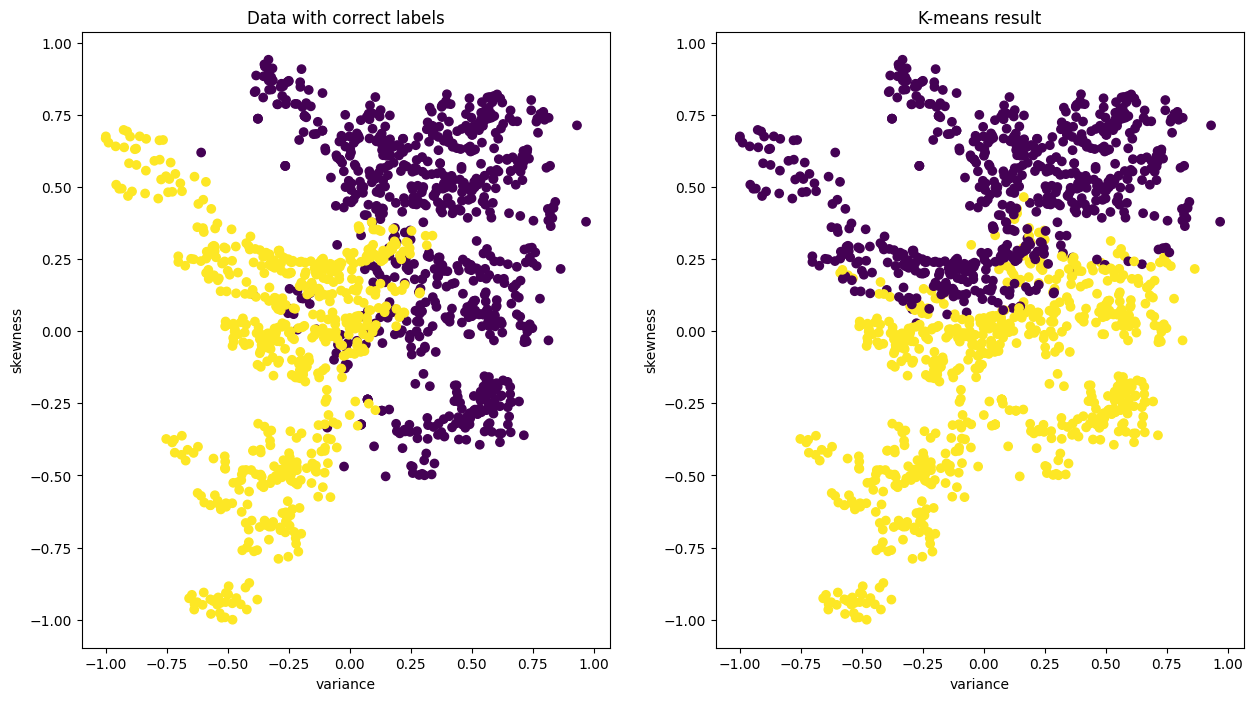

In [ ]:
# Plot the projection according to the k-means clusters
fig = plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y['class'].to_numpy())
plt.title('Data with correct labels')
plt.xlabel(x.columns.values[0])
plt.ylabel(x.columns.values[1])

plt.subplot(1,2,2)

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=kmeans_labels)
plt.title('K-means result')
plt.xlabel(x.columns.values[0])
plt.ylabel(x.columns.values[1])

plt.show()


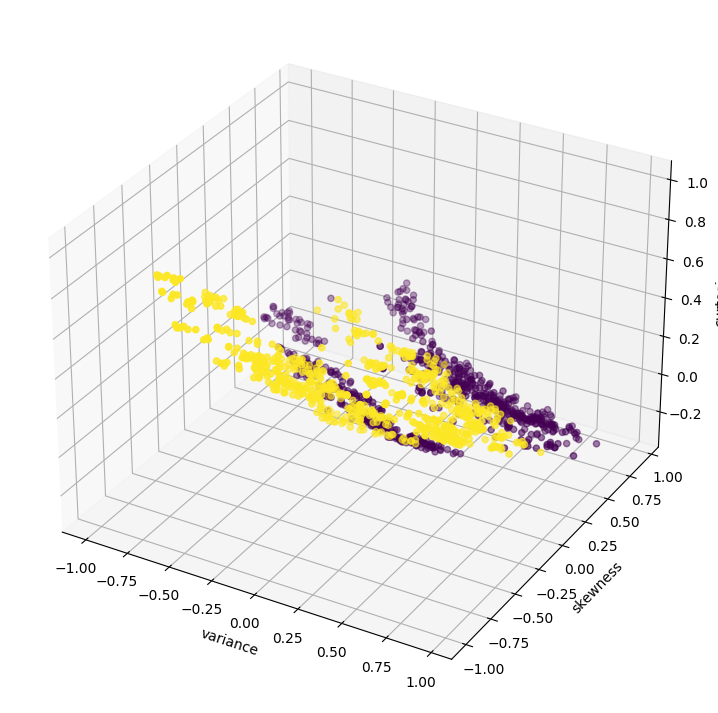

In [ ]:
# Plot the projection according to the k-means clusters
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(x.iloc[:,0], x.iloc[:,1], x.iloc[:,2], c=kmeans_labels)
ax.set_xlabel(x.columns.values[0])
ax.set_ylabel(x.columns.values[1])
ax.set_zlabel(x.columns.values[2])
plt.show()

In [ ]:
print("loss: ", l_kmeans)

loss:  3453.284127975091


In [ ]:
# calculate the accuracy of the model.
correct = 0

for i in range(0,1372):
    if kmeans_labels[i] == y.iloc[i,0]:
        correct+=1
print(correct/1371)

0.5594456601021153


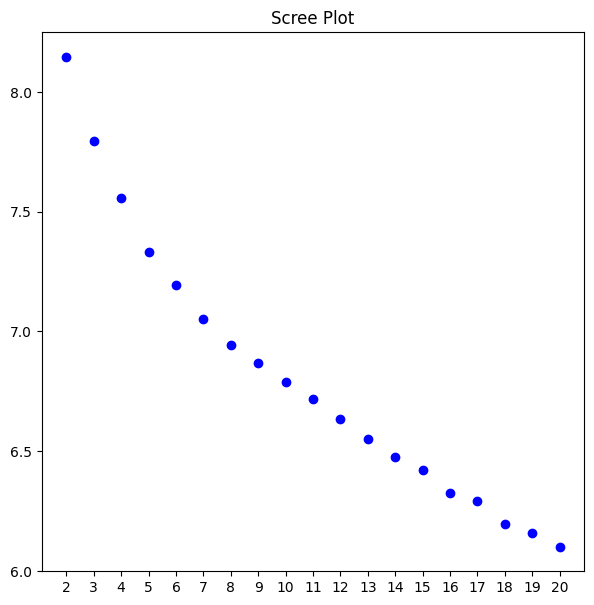

In [ ]:
# Scree plot to determine the optimal number of clusters (k) using k-means algorithm

# Possible values for k in k-means
nk_base = np.arange(2, 21)

# Initialize an array to store the loss values for each k
loss = np.zeros(nk_base.shape[0])

# Iterate over each value of k and compute the k-means loss
for i, nk in enumerate(nk_base):
    labels, l_kmeans = k_means(nk, x_scaled, init='++', n_init=20)
    loss[i] = l_kmeans

# Create a scatter plot of k versus the log of the loss
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(nk_base, np.log(loss), c='b')

# Set x-axis ticks to the possible values for k
ax.set_xticks(nk_base)

# Set plot title
ax.set_title('Scree Plot')

# Display the plot
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# linear fit of first 4 points
reg = LinearRegression().fit(nk_base[:4].reshape(-1, 1), np.log(loss[:4]))
aa = reg.predict(nk_base[:8].reshape(-1, 1))
# linear fit of last 4 points
reg2 = LinearRegression().fit(nk_base[16:20].reshape(-1, 1), np.log(loss[16:20]))
bb = reg2.predict(nk_base.reshape(-1, 1))

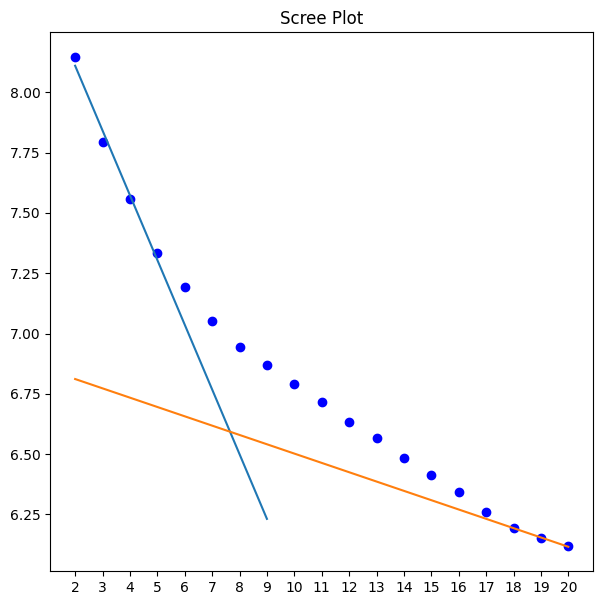

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(nk_base, np.log(loss), c='b')
ax.set_xticks(nk_base)
ax.set_title('Scree Plot')
ax.plot(nk_base[:8], aa[:8])
ax.plot(nk_base, bb)
plt.show()

## t-SNE


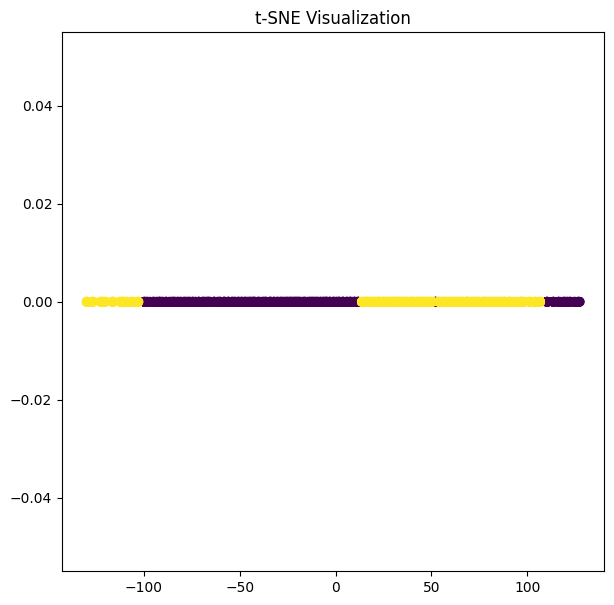

In [103]:
# Use t-SNE to embed high-dimensional data into a 2D space for visualization
from sklearn.manifold import TSNE

# Embed the data into 1D using t-SNE
X_embedded = TSNE(n_components=1, learning_rate='auto', init='random', perplexity=10).fit_transform(x_scaled)

# Create a scatter plot of the embedded data, colored by ground truth labels
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(X_embedded[:, 0], [0] * x.shape[0],  c=y.values)

# Set plot title
ax.set_title('t-SNE Visualization')

# Display the plot
plt.show()

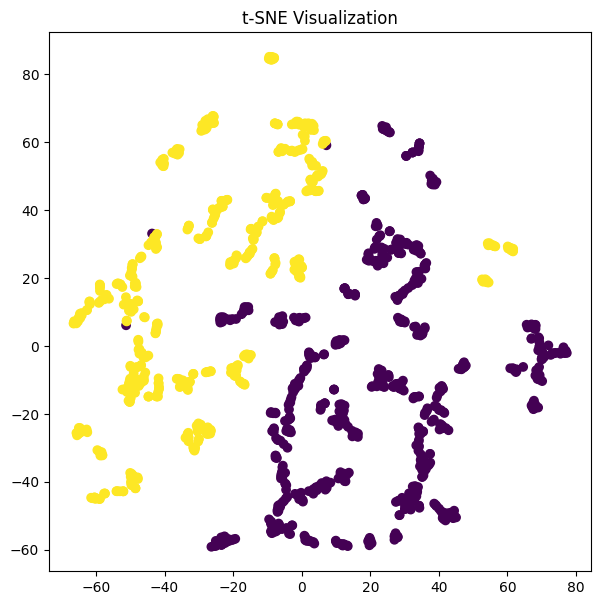

In [104]:
# Embed the data into 2D using t-SNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(x_scaled)

# Create a scatter plot of the embedded data, colored by ground truth labels
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y.values)

# Set plot title
ax.set_title('t-SNE Visualization')

# Display the plot
plt.show()

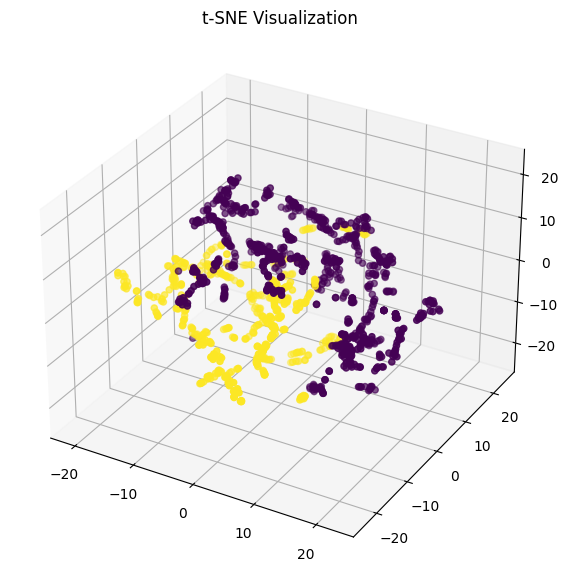

In [144]:
# Embed the data into 2D using t-SNE
X_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=10).fit_transform(x_scaled)

# Create a scatter plot of the embedded data, colored by ground truth labels
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y.values)

# Set plot title
ax.set_title('t-SNE Visualization')

# Display the plot
plt.show()

## DBSCAN

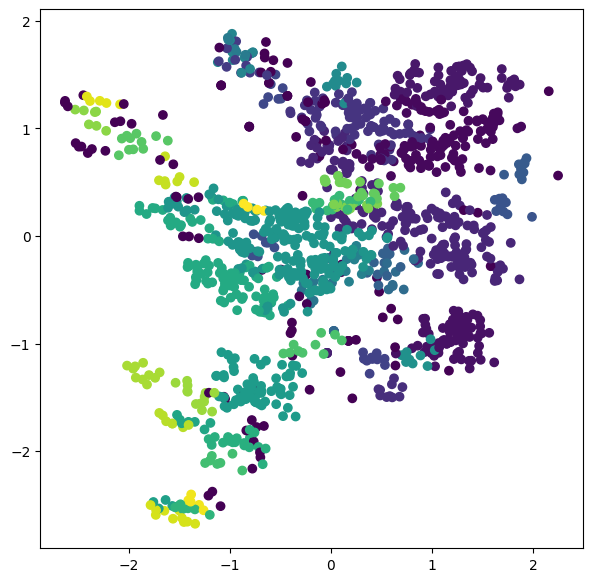

In [137]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering algorithm to the scaled data
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(x_scaled)

# Visualize the clusters in a 3D scatter plot using the first three Principal Components
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=dbscan.labels_)

# Display the 3D plot
plt.show()

# 3. Supervised Learning

Generate a subset of the data of 372 elements that would be saved as test set. With the rest of the data generate the following models: Logistic Regression, Decision tree (use the ID3 algorithm), Naive Bayesian and k-NN.

Investigate the effect of regularization (when possible) and use cross validation for setting the hyper-parameters when needed.

Compare the performances in terms of accuracy, precision, recall and F1-score on the test set. Comment these results at the light of those obtained from the Unsupervised Learning analysis. Could you propose a way to improve these results?     
